In [128]:
# importing basic liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [165]:
# screen reset code
# pd.reset_option("max_columns")

In [160]:
# importi
file = pd.read_csv("EEC QUE ANALYSIS.csv")

In [161]:
file

,YEAR,QUE,SUB-QUE,MARKS,UNIT,TOPIC-NO,TOPIC
0,2022,1,a,2,1,1.3,Series and parallel magnetic circuits
1,2022,1,b,2,2,2.2,Single phase A.C. sinusoidal A.C. wave: instan...
2,2022,1,c,2,3,3.3,Phase sequence and balanced and unbalanced load
3,2022,1,d,2,4,4.1,"Transformer: Working principle, emf equation, ..."
4,2022,1,e,2,4,4.5,"Types of D.C. motors, schematic diagram, 1, s..."
5,2022,1,f,2,5,5.3,"Stepper motor: types, principle of working and..."
6,2022,1,g,2,6,6.4,"Earthing: Importance of earthing, factors aff..."
7,2022,2,a,4,1,1.6,"B-H curve and hysteresis, hysteresis loop and ..."
8,2022,2,b,4,2,2.2,Single phase A.C. sinusoidal A.C. wave: instan...
9,2022,2,c,4,3,3.5,"Current, power, power factor in a 3 phase bala..."


In [162]:
# storing csv file in dataframe
df = pd.DataFrame(file)

In [163]:
df.head()

,YEAR,QUE,SUB-QUE,MARKS,UNIT,TOPIC-NO,TOPIC
0,2022,1,a,2,1,1.3,Series and parallel magnetic circuits
1,2022,1,b,2,2,2.2,Single phase A.C. sinusoidal A.C. wave: instan...
2,2022,1,c,2,3,3.3,Phase sequence and balanced and unbalanced load
3,2022,1,d,2,4,4.1,"Transformer: Working principle, emf equation, ..."
4,2022,1,e,2,4,4.5,"Types of D.C. motors, schematic diagram, 1, s..."



# EDA

In [132]:
# cheking size of df
df.shape

(130, 7)

In [133]:
# checking total numbers of topics asked from 2017-2022 
df['TOPIC'].nunique()

30

In [134]:
130/30

4.333333333333333

In [135]:
# storing topic numbers in array so that avg can be calculated
topics_array = np.array(df["TOPIC-NO"])

In [136]:
unit_avg = np.mean(topics_array)
print(unit_avg)

3.9884615384615385


In [137]:
6*unit_avg

23.93076923076923

In [138]:
# checking names of topics
print(df['TOPIC'].unique())

['Series and parallel magnetic circuits'
 'Single phase A.C. sinusoidal A.C. wave: instantaneous value, cycle, amplitude, time period, frequency, angular frequency, R.M.S. value, Average value for sinusoidal waveform, Form factor, Peak factor'
 'Phase sequence and balanced and unbalanced load'
 'Transformer: Working principle, emf equation, Voltage ratio, current ratio and transformation ratio, losses'
 'Types of D.C. motors, schematic diagram, 1,  series and compound motors'
 'Stepper motor: types, principle of working and applications'
 'Earthing:  Importance of earthing, factors affecting earthing'
 'B-H curve and hysteresis, hysteresis loop and hysteresis loss.'
 'Current, power, power factor in a 3 phase balanced system'
 'Auto-transformer - comparison with two winding transformer, applications'
 'Magnetic flux, flux density, magneto motive force, magnetic field strength, permeability, reluctance'
 'DC motor construction - parts its function and material used'
 'FHP: Schematic rep

### Data Visualization

In [139]:
df.columns

Index(['YEAR', 'QUE', 'SUB-QUE', 'MARKS', 'UNIT', 'TOPIC-NO', 'TOPIC'], dtype='object')

In [140]:
# setting whitegrid theme
sns.set_theme(style="whitegrid")

<AxesSubplot:xlabel='UNIT', ylabel='Count'>

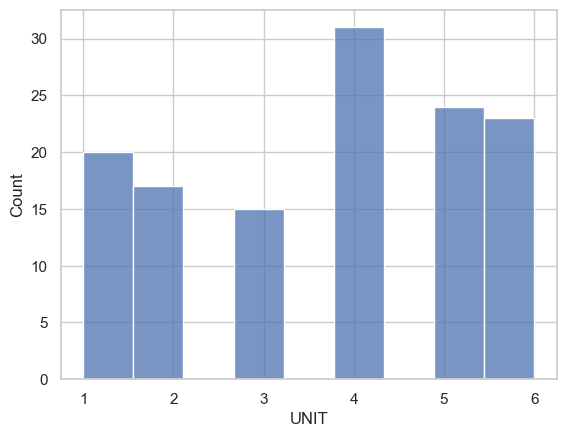

In [141]:
# checking 
sns.histplot(df["UNIT"])

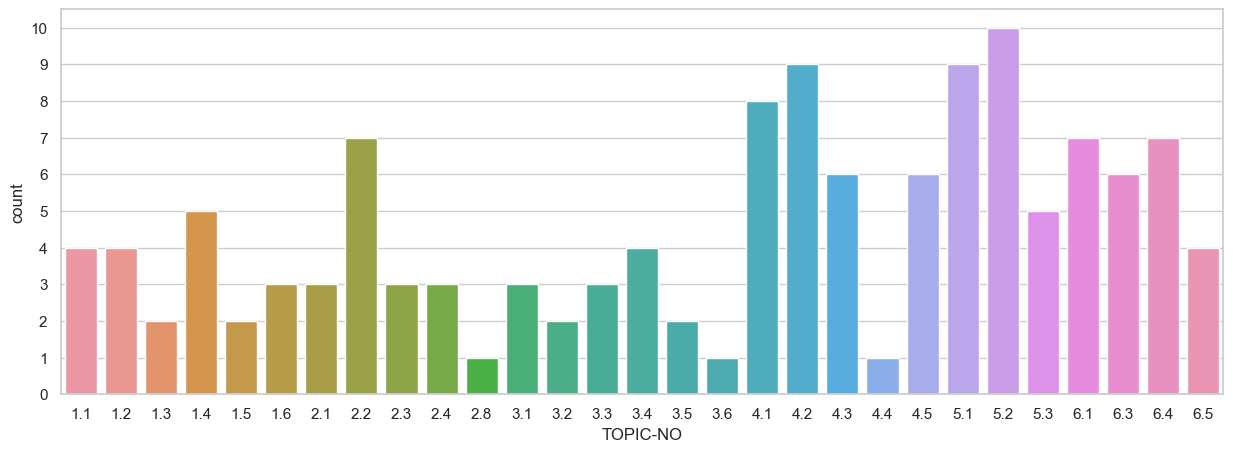

In [142]:
plt.figure(figsize=(15,5))
sns.countplot(df["TOPIC-NO"]).set_yticks([0,1,2,3,4,5,6,7,8,9,10])    # settled custom y axis using yticks

tried to automate writing above observation

In [143]:
# #checking frquency of each topic
# topic_no_freq = df["TOPIC-NO"].value_counts()
# topic_no_freq_df = pd.DataFrame(topic_no_freq)
# #cdumped to csv to rename header and index
# topic_no_freq_csv = topic_no_freq_df.to_csv()

In [144]:
# # importing,renaming that csv
# topic_no_freq_df = pd.read_csv(topic_no_freq_csv,header = None, names = ['TOPIC-NO','FREQ'])

In [213]:
df.columns

Index(['YEAR', 'QUE', 'SUB-QUE', 'MARKS', 'UNIT', 'TOPIC-NO', 'TOPIC'], dtype='object')

In [214]:
df.head()

,YEAR,QUE,SUB-QUE,MARKS,UNIT,TOPIC-NO,TOPIC
0,2022,1,a,2,1,1.3,Series and parallel magnetic circuits
1,2022,1,b,2,2,2.2,Single phase A.C. sinusoidal A.C. wave: instan...
2,2022,1,c,2,3,3.3,Phase sequence and balanced and unbalanced load
3,2022,1,d,2,4,4.1,"Transformer: Working principle, emf equation, ..."
4,2022,1,e,2,4,4.5,"Types of D.C. motors, schematic diagram, 1, s..."


<AxesSubplot:xlabel='UNIT', ylabel='MARKS'>

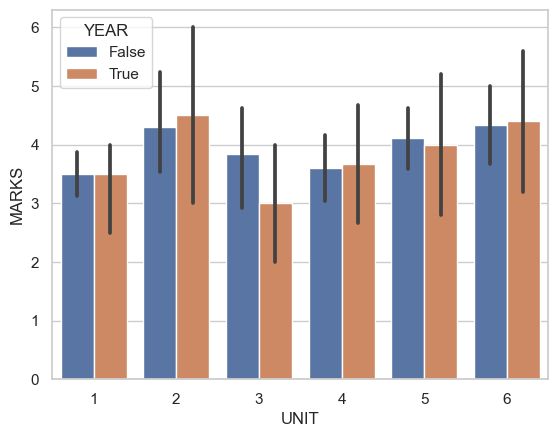

In [224]:
sns.barplot(df["UNIT"],df['MARKS'],hue = df['YEAR']==2022)

<AxesSubplot:xlabel='UNIT'>

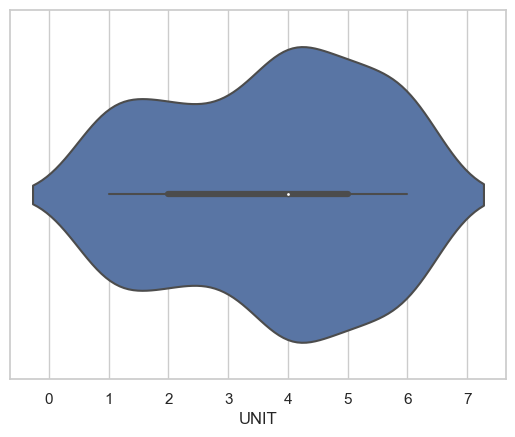

In [229]:
sns.violinplot(df['UNIT'])

In [243]:
df['YEAR'].unique()

array([2022, 2018, 2020, 2019], dtype=int64)

In [255]:
# creating 2022 year dataframe
_2022 = pd.DataFrame(df[df["YEAR"]==2022])
_2020 = pd.DataFrame(df[df["YEAR"]==2020])
_2019 = pd.DataFrame(df[df["YEAR"]==2019])
_2018 = pd.DataFrame(df[df["YEAR"]==2018])

_2022

,YEAR,QUE,SUB-QUE,MARKS,UNIT,TOPIC-NO,TOPIC
0,2022,1,a,2,1,1.3,Series and parallel magnetic circuits
1,2022,1,b,2,2,2.2,Single phase A.C. sinusoidal A.C. wave: instan...
2,2022,1,c,2,3,3.3,Phase sequence and balanced and unbalanced load
3,2022,1,d,2,4,4.1,"Transformer: Working principle, emf equation, ..."
4,2022,1,e,2,4,4.5,"Types of D.C. motors, schematic diagram, 1, s..."
5,2022,1,f,2,5,5.3,"Stepper motor: types, principle of working and..."
6,2022,1,g,2,6,6.4,"Earthing: Importance of earthing, factors aff..."
7,2022,2,a,4,1,1.6,"B-H curve and hysteresis, hysteresis loop and ..."
8,2022,2,b,4,2,2.2,Single phase A.C. sinusoidal A.C. wave: instan...
9,2022,2,c,4,3,3.5,"Current, power, power factor in a 3 phase bala..."


In [256]:
# # analyzing topics as per marks 
# years_data = ['_2022','_2020','2019','2018']
# for i in years_data:
#     print(i)
#     sns.swarmplot(data = i , x= 'TOPIC-NO', y='MARKS')

<AxesSubplot:xlabel='TOPIC-NO', ylabel='MARKS'>

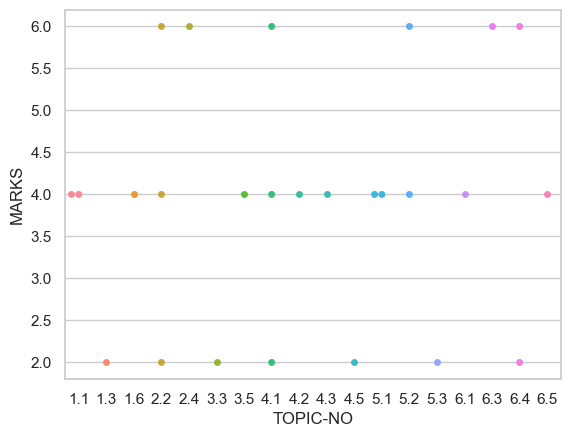

In [257]:
sns.swarmplot(data = _2022 , x= 'TOPIC-NO', y='MARKS')

<AxesSubplot:xlabel='TOPIC-NO', ylabel='MARKS'>

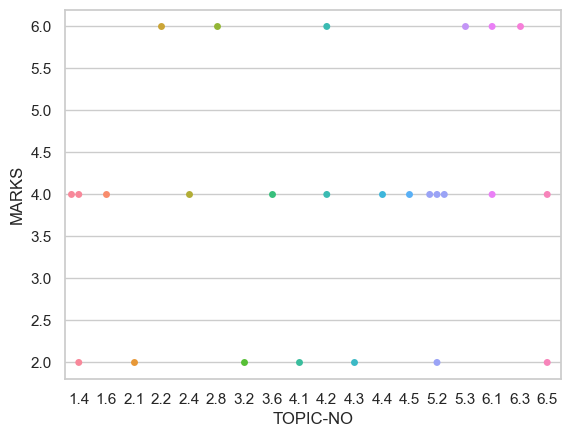

In [258]:
sns.swarmplot(data = _2020 , x= 'TOPIC-NO', y='MARKS')

<AxesSubplot:xlabel='TOPIC-NO', ylabel='MARKS'>

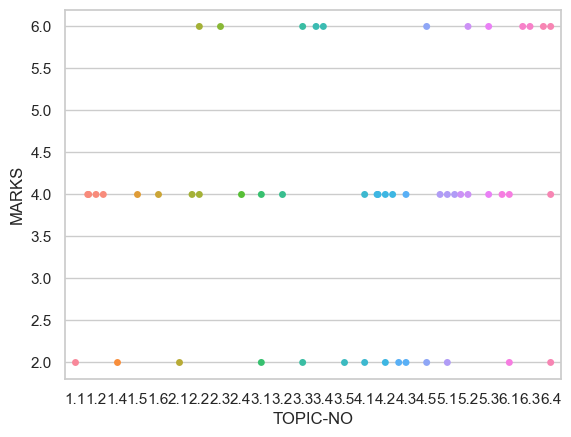

In [259]:
sns.swarmplot(data = _2019 , x= 'TOPIC-NO', y='MARKS')

<AxesSubplot:xlabel='TOPIC-NO', ylabel='MARKS'>

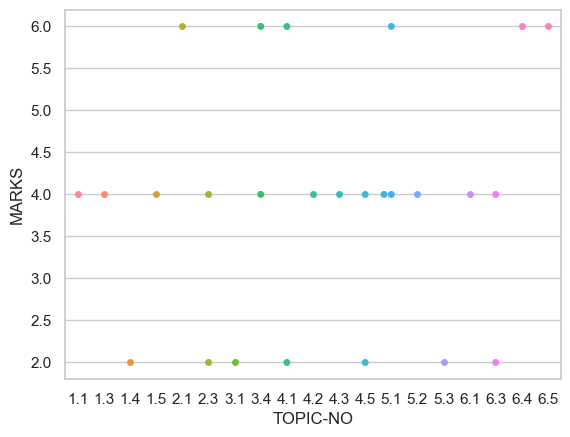

In [260]:
sns.swarmplot(data = _2018 , x= 'TOPIC-NO', y='MARKS')

In [263]:
df.columns

Index(['YEAR', 'QUE', 'SUB-QUE', 'MARKS', 'UNIT', 'TOPIC-NO', 'TOPIC'], dtype='object')

<AxesSubplot:xlabel='TOPIC-NO', ylabel='Density'>

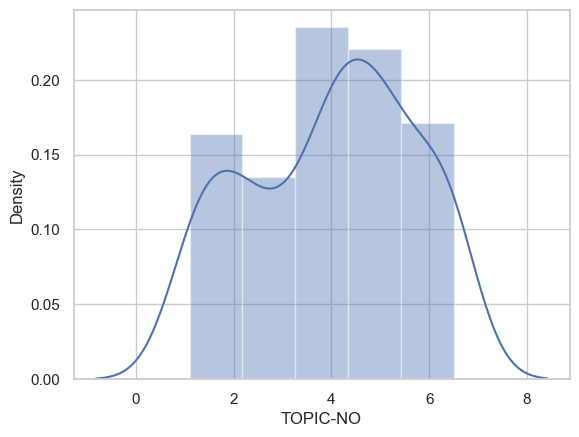

In [262]:
sns.distplot(df["TOPIC-NO"])

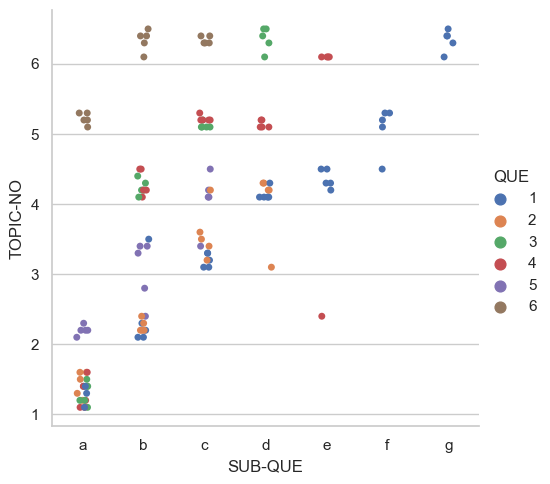

In [270]:
sns.catplot(data=df, x="SUB-QUE", y="TOPIC-NO",hue= "QUE")    #.set_yticks(range(0,6.8))

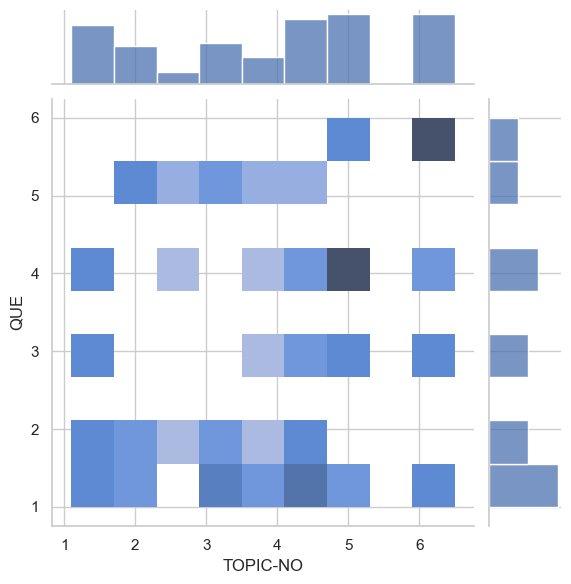

In [271]:
sns.jointplot(data=df, x="TOPIC-NO", y="QUE", kind="hist")

In [283]:
_1a = df[(df['QUE']==1) & (df['SUB-QUE']=='a')]
_1a

,YEAR,QUE,SUB-QUE,MARKS,UNIT,TOPIC-NO,TOPIC
0,2022,1,a,2,1,1.3,Series and parallel magnetic circuits
26,2018,1,a,2,1,1.4,"Faraday's laws of electromagnetic induction, F..."
52,2020,1,a,2,1,1.4,"Faraday's laws of electromagnetic induction, F..."
78,2019,1,a,2,1,1.4,"Faraday's laws of electromagnetic induction, F..."
104,2019,1,a,2,1,1.1,"Magnetic flux, flux density, magneto motive fo..."


In [284]:
_1a["TOPIC-NO"].value_counts()

1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64

In [285]:
_1b= df[(df['QUE']==1) & (df['SUB-QUE']=='b')]
_1b

,YEAR,QUE,SUB-QUE,MARKS,UNIT,TOPIC-NO,TOPIC
1,2022,1,b,2,2,2.2,Single phase A.C. sinusoidal A.C. wave: instan...
27,2018,1,b,2,2,2.3,Vector representation of sinusoidal A.C. quant...
53,2020,1,b,2,2,2.1,"A.C, and D.C. quantity, advantages of A.C. ove..."
79,2019,1,b,2,3,3.5,"Current, power, power factor in a 3 phase bala..."
105,2019,1,b,2,2,2.1,"A.C, and D.C. quantity, advantages of A.C. ove..."


In [286]:
_1b["TOPIC-NO"].value_counts()

2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64

In [287]:
_1c= df[(df['QUE']==1) & (df['SUB-QUE']=='c')]
_1c

,YEAR,QUE,SUB-QUE,MARKS,UNIT,TOPIC-NO,TOPIC
2,2022,1,c,2,3,3.3,Phase sequence and balanced and unbalanced load
28,2018,1,c,2,3,3.1,3 phase system over 1 phase system
54,2020,1,c,2,3,3.2,3-phase emf generation and its wave form
80,2019,1,c,2,3,3.3,Phase sequence and balanced and unbalanced load
106,2019,1,c,2,3,3.1,3 phase system over 1 phase system


In [288]:
_1c["TOPIC-NO"].value_counts()

3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64

In [294]:
_1=['1a','1b','1c','1d','1e','1f','1g']
_2=['2a','2b','2c','2d']
_3=['3a','3b','3c','3d']
_4=['4a','4b','4c','4d','4e']
_5=['5a','5b','5c']
_6=['6a','6b','6c']

In [298]:
all_que = _1 + _2 + _3 + _4 + _5 + _6
print(que)
len(que)

['1a', '1b', '1c', '1d', '1e', '1f', '1g', '2a', '2b', '2c', '2d', '3a', '3b', '3c', '3d', '4a', '4b', '4c', '4d', '4e', '5a', '5b', '5c', '6a', '6b', '6c']


26

In [299]:
que = [1,1,1,1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4,4,5,5,5,6,6,6]

In [300]:
sub_que = ['a','b','c','d','e','f','g','a','b','c','d','a','b','c','d','a','b','c','d','e','a','b','c','a','b','c']

In [316]:
# try:
for i in all_que:
    for o in que:
        for s in sub_que:
            i = df[(df['QUE']==o) & (df['SUB-QUE']==s)]
            print("QUE: ",o,"SUB-QUE: ",s,"\n",i["TOPIC-NO"].value_counts())
# except:
#     print("NO Q:",o," ",s)

QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  e 
 4.5    2
4.3    2
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  f 
 5.3    2
5.2    1
4.5    1
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  g 
 6.4    2
6.3    1
6.5    1
6.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3   

QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  e 
 4.5    2
4.3    2
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3   

 4.2    2
4.3    2
3.1    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  d 
 4.2    2
4.3    2
3.1    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  e

QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: i

QUE:  5 SUB-QUE:  b 
 3.4    2
2.4    1
2.8    1
3.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  c 
 4.1    2
4.2    1
3.4    1
4.5    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  a 
 2.2    3
2.1    1
2.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  b 
 3.4    2
2.4    1
2.8    1
3.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  c 
 4.1    2
4.2    1
3.4    1
4.5    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  a 
 2.2    3
2.1    1
2.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  b 
 3.4    2
2.4    1
2.8    1
3.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  c 
 4.1    2
4.2    1
3.4    1
4.5    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  a 
 2.2    3
2.1    1
2.3    1
Name: TOPIC-NO, dtype

QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  e 
 4.5    2
4.3    2
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  f 
 5.3    2
5.2    1
4.5    1
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  g 
 6.4    2
6.3    1
6.5    1
6.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: 

QUE:  2 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  2 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  2 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  d 
 4.2    2
4.3    2
3.1    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  d 
 4.2    2
4.3    2
3.1    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4   

QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2

 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  e 
 6.1    4
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2

QUE:  5 SUB-QUE:  b 
 3.4    2
2.4    1
2.8    1
3.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  c 
 4.1    2
4.2    1
3.4    1
4.5    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  a 
 2.2    3
2.1    1
2.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  b 
 3.4    2
2.4    1
2.8    1
3.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  c 
 4.1    2
4.2    1
3.4    1
4.5    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  a 
 2.2    3
2.1    1
2.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  b 
 3.4    2
2.4    1
2.8    1
3.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  c 
 4.1    2
4.2    1
3.4    1
4.5    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  a 
 2.2    3
2.1    1
2.3    1
Name: TOPIC-NO, dtype

QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  e 
 4.5    2
4.3    2
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  f 
 5.3    2
5.2    1
4.5    1
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  g 
 6.4    2
6.3    1
6.5    1
6.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1   

QUE:  3 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3

QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  e 
 6.1    4
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  4 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1

QUE:  5 SUB-QUE:  c 
 4.1    2
4.2    1
3.4    1
4.5    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  a 
 2.2    3
2.1    1
2.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  b 
 3.4    2
2.4    1
2.8    1
3.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  c 
 4.1    2
4.2    1
3.4    1
4.5    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  a 
 2.2    3
2.1    1
2.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  b 
 3.4    2
2.4    1
2.8    1
3.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  c 
 4.1    2
4.2    1
3.4    1
4.5    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  a 
 2.2    3
2.1    1
2.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  b 
 3.4    2
2.4    1
2.8    1
3.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  c 
 4.1    2
4.2    1
3.4    1
4.5    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  d 
 Series([]

QUE:  6 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dt

 6.4    2
6.3    1
6.5    1
6.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int6

QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  d 
 4.2    2
4.3    2
3.1    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  d 
 4.2    2
4.3    2
3.1    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  d 
 4.2    2
4.3    2
3.1    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int6

QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3

QUE:  5 SUB-QUE:  c 
 4.1    2
4.2    1
3.4    1
4.5    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  a 
 2.2    3
2.1    1
2.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  b 
 3.4    2
2.4    1
2.8    1
3.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  c 
 4.1    2
4.2    1
3.4    1
4.5    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  a 
 2.2    3
2.1    1
2.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  b 
 3.4    2
2.4    1
2.8    1
3.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  c 
 4.1    2
4.2    1
3.4    1
4.5    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  a 
 2.2    3
2.1    1
2.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  b 
 3.4    2
2.4    1
2.8    1
3.3    1
Name: TOPIC-NO, dtype

QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  e 
 4.5    2
4.3    2
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  f 
 5.3    2
5.2    1
4.5    1
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  g 
 6.4    2
6.3    1
6.5    1
6.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: 

QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  e 
 4.5    2
4.3    2
4.2    1
Name: TOPIC-NO,

QUE:  2 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  2 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  d 
 4.2    2
4.3    2
3.1    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  d 
 4.2    2
4.3    2
3.1    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1


QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3

QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  e 
 6.1    4
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:

QUE:  5 SUB-QUE:  a 
 2.2    3
2.1    1
2.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  b 
 3.4    2
2.4    1
2.8    1
3.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  c 
 4.1    2
4.2    1
3.4    1
4.5    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  a 
 2.2    3
2.1    1
2.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  b 
 3.4    2
2.4    1
2.8    1
3.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  c 
 4.1    2
4.2    1
3.4    1
4.5    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SU

QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  e 
 4.5    2
4.3    2
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO,

QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  e 
 4.5    2
4.3    2
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1   

QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Nam

QUE:  5 SUB-QUE:  c 
 4.1    2
4.2    1
3.4    1
4.5    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  a 
 2.2    3
2.1    1
2.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  b 
 3.4    2
2.4    1
2.8    1
3.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  c 
 4.1    2
4.2    1
3.4    1
4.5    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  a 
 2.2    3
2.1    1
2.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  b 
 3.4    2
2.4    1
2.8    1
3.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  c 
 4.1    2
4.2    1
3.4    1
4.5    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  a 
 2.2    3
2.1    1
2.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  b 
 3.4    2
2.4    1
2.8    1
3.3    1
Name: TOPIC-NO, dtype

QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  e 
 4.5    2
4.3    2
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  f 
 5.3    2
5.2    1
4.5    1
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  g 
 6.4    2
6.3    1
6.5    1
6.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1   

QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  d 
 4.2    2
4.3    2
3.1    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  2 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  2 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  d 
 4.2    2
4.3   

QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: i

QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1   

QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  e 
 4.5    2
4.3    2
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO,

QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1

QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  e 
 6.1    4
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 

QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  e 
 4.5    2
4.3    2
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  f 
 5.3    2
5.2    1
4.5    1
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  g 
 6.4    2
6.3    1
6.5    1
6.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3   

QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  e 
 4.5    2
4.3    2
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3   

 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2   

 4.1    2
4.2    1
3.4    1
4.5    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  a 
 2.2    3
2.1    1
2.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  b 
 3.4    2
2.4    1
2.8    1
3.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  c 
 4.1    2
4.2    1
3.4    1
4.5    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  a 
 2.2    3
2.1    1
2.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  b 
 3.4    2
2.4    1
2.8    1
3.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  c 
 4.1    2
4.2    1
3.4    1
4.5    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  a 
 2.2    3
2.1    1
2.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  b 
 3.4    2
2.4    1
2.8    1
3.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  c 
 4.1    2
4.2    1
3.4    1
4.5    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dty

QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-

QUE:  2 SUB-QUE:  d 
 4.2    2
4.3    2
3.1    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  2 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  2 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  d 
 4.2    2
4.3    2
3.1    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  d 
 4.2    2
4.3    2
3.1    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5   

QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: i

 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  e 
 6.1    4
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2

 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:

QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  e 
 4.5    2
4.3    2
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO,

 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  d 
 4.2    2
4.3    2
3.1    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  2 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  2 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  d 
 4.2    2
4.3    2
3.1    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  d 
 4.2    2
4.3    2
3.1    1
Name: TOP

 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1   

QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  e 
 6.1    4
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  4 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6

QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  e 
 4.5    2
4.3    2
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  f 
 5.3    2
5.2    1
4.5    1
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  g 
 6.4    2
6.3    1
6.5    1
6.1   

 4.2    2
4.3    2
3.1    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  d 
 4.2    2
4.3    2
3.1    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  d 
 4.2    2
4.3    2
3.1    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4   

 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4   

 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  e 
 6.1    4
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2

QUE:  5 SUB-QUE:  b 
 3.4    2
2.4    1
2.8    1
3.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  c 
 4.1    2
4.2    1
3.4    1
4.5    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  a 
 2.2    3
2.1    1
2.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  b 
 3.4    2
2.4    1
2.8    1
3.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  c 
 4.1    2
4.2    1
3.4    1
4.5    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  a 
 2.2    3
2.1    1
2.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  b 
 3.4    2
2.4    1
2.8    1
3.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  c 
 4.1    2
4.2    1
3.4    1
4.5    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  a 
 2.2    3
2.1    1
2.3    1
Name: TOPIC-NO, dtype

 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  e 
 4.5    2
4.3    2
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dt

QUE:  2 SUB-QUE:  d 
 4.2    2
4.3    2
3.1    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  2 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  2 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  d 
 4.2    2
4.3    2
3.1    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  d 
 4.2    2
4.3    2
3.1    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5   

QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: i

QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  e 
 6.1    4
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 

QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  e 
 4.5    2
4.3    2
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5   

QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  e 
 4.5    2
4.3    2
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: 

QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: i

QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  e 
 6.1    4
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-Q

QUE:  6 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  e 
 Series([], Name: TOPIC-N

 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  e 
 4.5    2
4.3    2
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int6

QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  d 
 4.2    2
4.3    2
3.1    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  d 
 4.2    2
4.3    2
3.1    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  d 
 4.2    2
4.3    2
3.1    1
Name: TOPIC-

QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  e 
 6.1    4
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  4 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3

 4.1    2
4.2    1
3.4    1
4.5    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  a 
 2.2    3
2.1    1
2.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  b 
 3.4    2
2.4    1
2.8    1
3.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  c 
 4.1    2
4.2    1
3.4    1
4.5    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  a 
 2.2    3
2.1    1
2.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  b 
 3.4    2
2.4    1
2.8    1
3.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  c 
 4.1    2
4.2    1
3.4    1
4.5    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  a 
 2.2    3
2.1    1
2.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  b 
 3.4    2
2.4    1
2.8    1
3.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-Q

QUE:  6 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1   

QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  e 
 4.5    2
4.3    2
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  f 
 5.3    2
5.2    1
4.5    1
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  g 
 6.4    2
6.3    1
6.5    1
6.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4   

 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  d 
 4.2    2
4.3    2
3.1    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  d 
 4.2    2
4.3    2
3.1    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  a

QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: i

QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  e 
 6.1    4
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:

QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2


QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  e 
 4.5    2
4.3    2
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3   

QUE:  2 SUB-QUE:  d 
 4.2    2
4.3    2
3.1    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  d 
 4.2    2
4.3    2
3.1    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int6

QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:

 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  e 
 6.1    4
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  4 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO,

 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:

QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  e 
 4.5    2
4.3    2
4.2    1
Name: TOPIC-NO,

QUE:  2 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  f 
 

 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  e 
 6.1    4
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  4 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: 

 6.1    4
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  a 
 2.2    3
2.1    1
2.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  b 
 3.4    2
2.4    1
2.8    1
3.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  c 
 4.1    2
4.2    1
3.4    1
4.5    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  g 
 Series([], Name: TOPI

QUE:  1 SUB-QUE:  f 
 5.3    2
5.2    1
4.5    1
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  g 
 6.4    2
6.3    1
6.5    1
6.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1   

QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  e 
 4.5    2
4.3    2
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: 

QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4

QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  e 
 6.1    4
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  4 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3

QUE:  6 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  f 
 Series([], Name: TOPIC-N

QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  e 
 4.5    2
4.3    2
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  f 
 5.3    2
5.2    1
4.5    1
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  g 
 6.4    2
6.3    1
6.5    1
6.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1   

 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:

QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  e 
 6.1    4
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  4 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Nam

QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1

 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  e 
 4.5    2
4.3    2
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  f 
 5.3    2
5.2    1
4.5    1
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  g 
 6.4    2
6.3    1
6.5    1
6.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOP

QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  d 
 4.2    2
4.3    2
3.1    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  2 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  2 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  d 
 4.2    2
4.3    2
3.1    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3   

QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SU

QUE:  4 SUB-QUE:  e 
 6.1    4
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  e 
 6.1    4
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  4 SUB-QUE:  g 
 Series

QUE:  5 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  a 
 2.2    3
2.1    1
2.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  b 
 3.4    2
2.4    1
2.8    1
3.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  c 
 4.1    2
4.2    1
3.4    1
4.5    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  a 
 2.2    3
2.1    1
2.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  b 
 3.4    2
2.4    1
2.8    1
3.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  c 
 4.1    2
4.2    1
3.4    1
4.5    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  a 
 2.2    3
2.1    1
2.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  b 
 3.4    2
2.4    1
2.8    1
3.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  c 
 4.1    2
4.2    1
3.4    1
4.5    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype:

QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  e 
 4.5    2
4.3    2
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1   

QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  d 
 4.2    2
4.3    2
3.1    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  2 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  2 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3   

QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: i

QUE:  5 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  a 
 2.2    3
2.1    1
2.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  b 
 3.4    2
2.4    1
2.8    1
3.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  c 
 4.1    2
4.2    1
3.4    1
4.5    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  a 
 2.2    3
2.1    1
2.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  b 
 3.4    2
2.4    1
2.8    1
3.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  c 
 4.1    2
4.2    1
3.4    1
4.5    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  a 
 2.2    3
2.1    1
2.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  b 
 3.4    2
2.4    1
2.8    1
3.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  c 
 4.1    2
4.2    1
3.4    1
4.5    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype:

QUE:  6 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  d 
 Series([], Name: TOPIC-N

 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  e 
 4.5    2
4.3    2
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  f 
 5.3    2
5.2    1
4.5    1
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  g 
 6.4    2
6.3    1
6.5    1
6.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1


QUE:  3 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: 

 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  e 
 6.1    4
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  4 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:

QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  e 
 Series([], Name: T

QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  e 
 4.5    2
4.3    2
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO,

QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: 

QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  e 
 6.1    4
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  e 
 

QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  6 SUB-QUE:  a 
 5.2    2
5.3    2
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  b 
 6.4    2
6.5    1
6.1    1
6.3    1
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  c 
 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64
QUE:  6 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64

 4.5    2
4.3    2
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  f 
 5.3    2
5.2    1
4.5    1
5.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  g 
 6.4    2
6.3    1
6.5    1
6.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOP

QUE:  2 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  d 
 4.2    2
4.3    2
3.1    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  2 SUB-Q

QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SU

 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  e 
 6.1    4
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  4 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO,

QUE:  5 SUB-QUE:  a 
 2.2    3
2.1    1
2.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  b 
 3.4    2
2.4    1
2.8    1
3.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  c 
 4.1    2
4.2    1
3.4    1
4.5    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  a 
 2.2    3
2.1    1
2.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  b 
 3.4    2
2.4    1
2.8    1
3.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  c 
 4.1    2
4.2    1
3.4    1
4.5    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  a 
 2.2    3
2.1    1
2.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  b 
 3.4    2
2.4    1
2.8    1
3.3    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  c 
 4.1    2
4.2    1
3.4    1
4.5    1
Name: TOPIC-NO, dtype: int64
QUE:  5 SUB-QUE:  d 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  5 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype:

QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  e 
 4.5    2
4.3    2
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5   

QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  e 
 4.5    2
4.3    2
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  a 
 1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  b 
 2.1    2
2.2    1
2.3    1
3.5    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  c 
 3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64
QUE:  1 SUB-QUE:  d 
 4.1    4
4.3    1
Name: 

QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  d 
 4.2    2
4.3    2
3.1    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  d 
 4.2    2
4.3    2
3.1    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  2 SUB-QUE:  a 
 1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  b 
 2.2    3
2.3    1
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  2 SUB-QUE:  c 
 3.5    1
3.4    1
3.6    1
3.2    1
4.2    1
Name: TOPIC-NO, dtype: int6

QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  c 
 5.1    4
5.2    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  d 
 6.5    2
6.3    1
6.1    1
6.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  e 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  3 SUB-QUE:  a 
 1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int64
QUE:  3 SUB-QUE:  b 
 4.2    2
4.3    1
4.4    1
4.1    1
Name: TOPIC-NO, dtype: i

QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  e 
 6.1    4
2.4    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  f 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  4 SUB-QUE:  g 
 Series([], Name: TOPIC-NO, dtype: int64)
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  c 
 5.2    4
5.3    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  d 
 5.1    3
5.2    2
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  a 
 1.1    2
1.4    1
1.2    1
1.6    1
Name: TOPIC-NO, dtype: int64
QUE:  4 SUB-QUE:  b 
 4.5    2
4.2    2
4.1

 6.3    3
6.4    2
Name: TOPIC-NO, dtype: int64


In [329]:
# Trying to automate this process

In [318]:
# imported itertools library to avoid duplicate iterations
import itertools

In [331]:
# used a single for loop with along with 2 index with itertools.product and under that bracket is iterables
for o, s in itertools.product(que, sub_que):
    # printed data for particular question like 1a,2b etc.
    #(4 rows bcoz 4 papers and all question numbers are unique )
    i = df[(df['QUE'] == o) & (df['SUB-QUE'] == s)]
    # stored that topics value counts
    possible_topics = i["TOPIC-NO"].value_counts()
    print("Most Asked Topic In","\n","QUE: ", o, "SUB-QUE: ", s,":")
    #value counts starts from most frequent therefore head 1 used
    print(possible_topics.head(1),"\n")

Most Asked Topic In 
 QUE:  1 SUB-QUE:  a :
1.4    3
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  1 SUB-QUE:  b :
2.1    2
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  1 SUB-QUE:  c :
3.3    2
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  1 SUB-QUE:  d :
4.1    4
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  1 SUB-QUE:  e :
4.5    2
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  1 SUB-QUE:  f :
5.3    2
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  1 SUB-QUE:  g :
6.4    2
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  1 SUB-QUE:  a :
1.4    3
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  1 SUB-QUE:  b :
2.1    2
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  1 SUB-QUE:  c :
3.3    2
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  1 SUB-QUE:  d :
4.1    4
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  1 SUB-QUE:  a :
1.4    3
Name: TOPIC-NO, dtype: 

Most Asked Topic In 
 QUE:  1 SUB-QUE:  c :
3.3    2
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  2 SUB-QUE:  a :
1.6    2
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  2 SUB-QUE:  b :
2.2    3
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  2 SUB-QUE:  c :
3.5    1
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  2 SUB-QUE:  d :
4.2    2
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  2 SUB-QUE:  e :
Series([], Name: TOPIC-NO, dtype: int64) 

Most Asked Topic In 
 QUE:  2 SUB-QUE:  f :
Series([], Name: TOPIC-NO, dtype: int64) 

Most Asked Topic In 
 QUE:  2 SUB-QUE:  g :
Series([], Name: TOPIC-NO, dtype: int64) 

Most Asked Topic In 
 QUE:  2 SUB-QUE:  a :
1.6    2
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  2 SUB-QUE:  b :
2.2    3
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  2 SUB-QUE:  c :
3.5    1
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  2 SUB-QUE:  d :
4.2    2
Name: TOPIC-NO

Most Asked Topic In 
 QUE:  3 SUB-QUE:  c :
5.1    4
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  3 SUB-QUE:  d :
6.5    2
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  3 SUB-QUE:  e :
Series([], Name: TOPIC-NO, dtype: int64) 

Most Asked Topic In 
 QUE:  3 SUB-QUE:  f :
Series([], Name: TOPIC-NO, dtype: int64) 

Most Asked Topic In 
 QUE:  3 SUB-QUE:  g :
Series([], Name: TOPIC-NO, dtype: int64) 

Most Asked Topic In 
 QUE:  3 SUB-QUE:  a :
1.2    2
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  3 SUB-QUE:  b :
4.2    2
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  3 SUB-QUE:  c :
5.1    4
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  3 SUB-QUE:  d :
6.5    2
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  3 SUB-QUE:  a :
1.2    2
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  3 SUB-QUE:  b :
4.2    2
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  3 SUB-QUE:  c :
5.1    4
Name: TOPIC-NO

Most Asked Topic In 
 QUE:  3 SUB-QUE:  b :
4.2    2
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  3 SUB-QUE:  c :
5.1    4
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  4 SUB-QUE:  a :
1.1    2
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  4 SUB-QUE:  b :
4.5    2
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  4 SUB-QUE:  c :
5.2    4
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  4 SUB-QUE:  d :
5.1    3
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  4 SUB-QUE:  e :
6.1    4
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  4 SUB-QUE:  f :
Series([], Name: TOPIC-NO, dtype: int64) 

Most Asked Topic In 
 QUE:  4 SUB-QUE:  g :
Series([], Name: TOPIC-NO, dtype: int64) 

Most Asked Topic In 
 QUE:  4 SUB-QUE:  a :
1.1    2
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  4 SUB-QUE:  b :
4.5    2
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  4 SUB-QUE:  c :
5.2    4
Name: TOPIC-NO, d

Most Asked Topic In 
 QUE:  5 SUB-QUE:  d :
Series([], Name: TOPIC-NO, dtype: int64) 

Most Asked Topic In 
 QUE:  5 SUB-QUE:  a :
2.2    3
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  5 SUB-QUE:  b :
3.4    2
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  5 SUB-QUE:  c :
4.1    2
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  5 SUB-QUE:  d :
Series([], Name: TOPIC-NO, dtype: int64) 

Most Asked Topic In 
 QUE:  5 SUB-QUE:  e :
Series([], Name: TOPIC-NO, dtype: int64) 

Most Asked Topic In 
 QUE:  5 SUB-QUE:  a :
2.2    3
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  5 SUB-QUE:  b :
3.4    2
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  5 SUB-QUE:  c :
4.1    2
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  5 SUB-QUE:  a :
2.2    3
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  5 SUB-QUE:  b :
3.4    2
Name: TOPIC-NO, dtype: int64 

Most Asked Topic In 
 QUE:  5 SUB-QUE:  c :
4.1    2
Name: TOPIC-NO

### P SQL

In [150]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

In [205]:
# # printing topics came for 2 marks
# two_marks_topics = pd.DataFramedf[df["MARKS"]==2]
# print(two_marks_topics.value_counts)

,YEAR,QUE,SUB-QUE,MARKS,UNIT,TOPIC-NO,TOPIC
0,2022,1,a,2,1,1.3,Series and parallel magnetic circuits
1,2022,1,b,2,2,2.2,Single phase A.C. sinusoidal A.C. wave: instan...
2,2022,1,c,2,3,3.3,Phase sequence and balanced and unbalanced load
3,2022,1,d,2,4,4.1,"Transformer: Working principle, emf equation, ..."
4,2022,1,e,2,4,4.5,"Types of D.C. motors, schematic diagram, 1, s..."
5,2022,1,f,2,5,5.3,"Stepper motor: types, principle of working and..."
6,2022,1,g,2,6,6.4,"Earthing: Importance of earthing, factors aff..."
26,2018,1,a,2,1,1.4,"Faraday's laws of electromagnetic induction, F..."
27,2018,1,b,2,2,2.3,Vector representation of sinusoidal A.C. quant...
28,2018,1,c,2,3,3.1,3 phase system over 1 phase system


In [210]:
# checking frequency of each asked topic for 2 marks

In [170]:
# marks = list(df["MARKS"].unique())

In [211]:
# for i in marks:
#     most_asked_for_x_marks = df[df["MARKS"]==i].unique 
#     print(most_asked_for_x_marks,"\n \n \n")